Epoch 1/5
34/34 [==============================] - 262s 8s/step - loss: 16.1000 - acc: 0.0586 - val_loss: 3.0416 - val_acc: 0.0537
Epoch 2/5
34/34 [==============================] - 247s 7s/step - loss: 2.9929 - acc: 0.0683 - val_loss: 2.9639 - val_acc: 0.0788
Epoch 3/5
34/34 [==============================] - 258s 8s/step - loss: 2.8888 - acc: 0.0930 - val_loss: 2.9595 - val_acc: 0.0919
Epoch 4/5
34/34 [==============================] - 256s 8s/step - loss: 2.7445 - acc: 0.1411 - val_loss: 2.6472 - val_acc: 0.1774
Epoch 5/5
89/89 [==============================] - 27s 307ms/step - loss: 2.3058 - acc: 0.2945
Evaluation result on Test Data : Loss = 2.305750608444214, accuracy = 0.2944503426551819


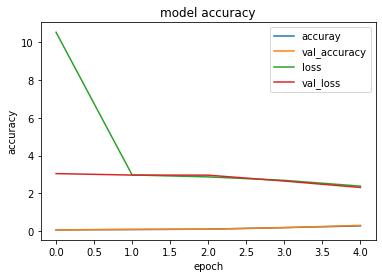

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual Prediction 6 Predicted Prediction [13]


In [3]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from sklearn.model_selection import train_test_split

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target
max_review_len= max([len(s.split()) for s in sentences])

#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

#Preprocessing the data and transforming
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Doing the same for 20 news data
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(layers.Flatten())
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

#Calculating the loss and accuracy by evaluating the data
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# plotting loss and accuracy using history object
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()

# Predicting with the sample data
pred = model.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)
